In [1]:
import logging
import os
from datetime import datetime



In [2]:
logs_dir = os.path.join(os.getcwd(), 'logs')

In [3]:
os.getcwd()

'd:\\LLM Study\\LLMOps\\LLMOPS-PROJECT\\document_portal\\notebook'

In [4]:
os.makedirs(logs_dir, exist_ok=True)

In [5]:
LOG_FILE = f"{datetime.now().strftime('%m-%d-%Y_%H-%M-%S')}.log" 
LOG_FILE

'07-26-2025_16-28-18.log'

In [6]:
LOG_FILE_PATH =os.path.join(logs_dir, LOG_FILE)

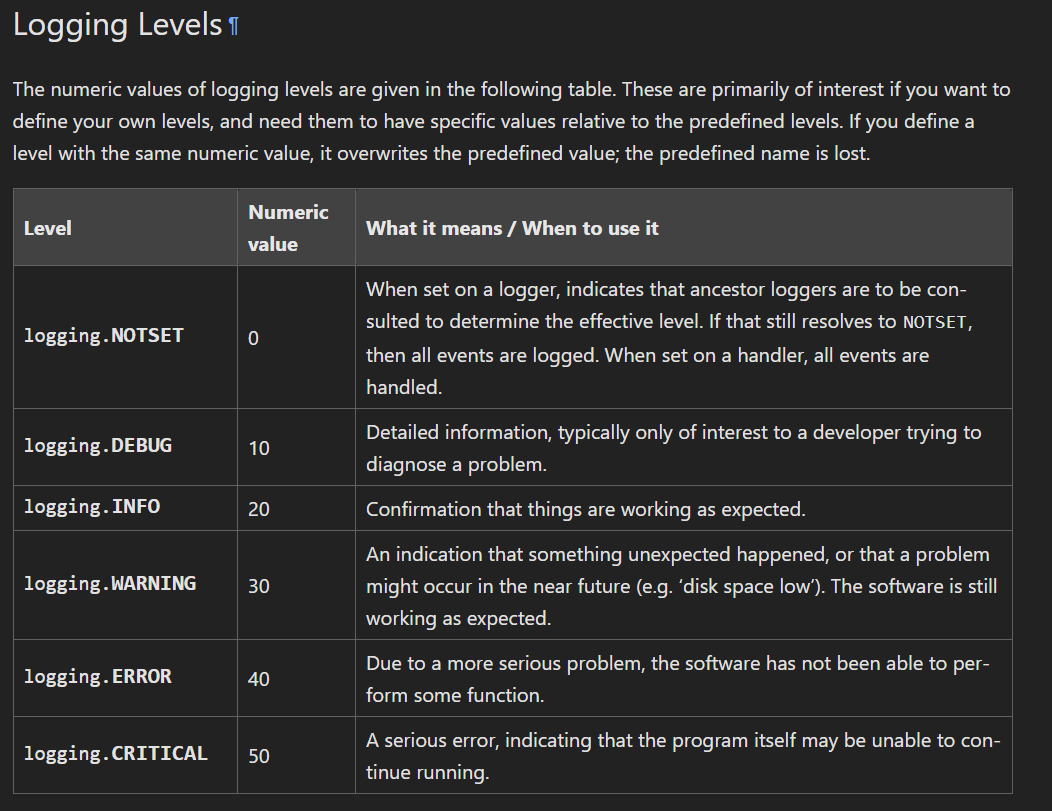

In [7]:
logging.basicConfig(
    filename=LOG_FILE_PATH,
    level=logging.INFO,
    format='[ %(asctime)s ]- %(levelname)s %(name)s (line:%(lineno)d) - %(message)s',
)

In [8]:
logger = logging.getLogger("DocumentPortal")

In [9]:
logger.info("This is an info message")

In [10]:
import structlog

log = structlog.get_logger()

In [11]:
log

<BoundLoggerLazyProxy(logger=None, wrapper_class=None, processors=None, context_class=None, initial_values={}, logger_factory_args=())>

In [15]:
structlog.configure(
    processors=[
        # Filter logs based on the level set in the standard logger
        structlog.stdlib.filter_by_level,
        # Add logger name and log level to the event dict
        structlog.stdlib.add_logger_name,
        structlog.stdlib.add_log_level,
        # Add a timestamp
        structlog.processors.TimeStamper(fmt="iso"),
        # Render exceptions
        structlog.processors.format_exc_info,
        # Decode unicode characters
        structlog.processors.UnicodeDecoder(),
        # This is the key processor that prepares the log for the standard logger.
        # It renders the event dict as the `msg` and moves the key-value pairs
        # to `extra` so the standard logger can handle them.
        structlog.stdlib.render_to_log_kwargs,
    ],
    # Use the standard library's logger factory
    logger_factory=structlog.stdlib.LoggerFactory(),
    # Use a wrapper class that is compatible with the standard library
    wrapper_class=structlog.stdlib.BoundLogger,
    # Cache the logger for performance
    cache_logger_on_first_use=True,
)

In [18]:

import structlog

log = structlog.get_logger()


In [21]:
log.info("This is an info message", userid = 123, action="login")